In [1]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [2]:
filename = 'FF.MI.xlsx'
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')

filename_bm = 'FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

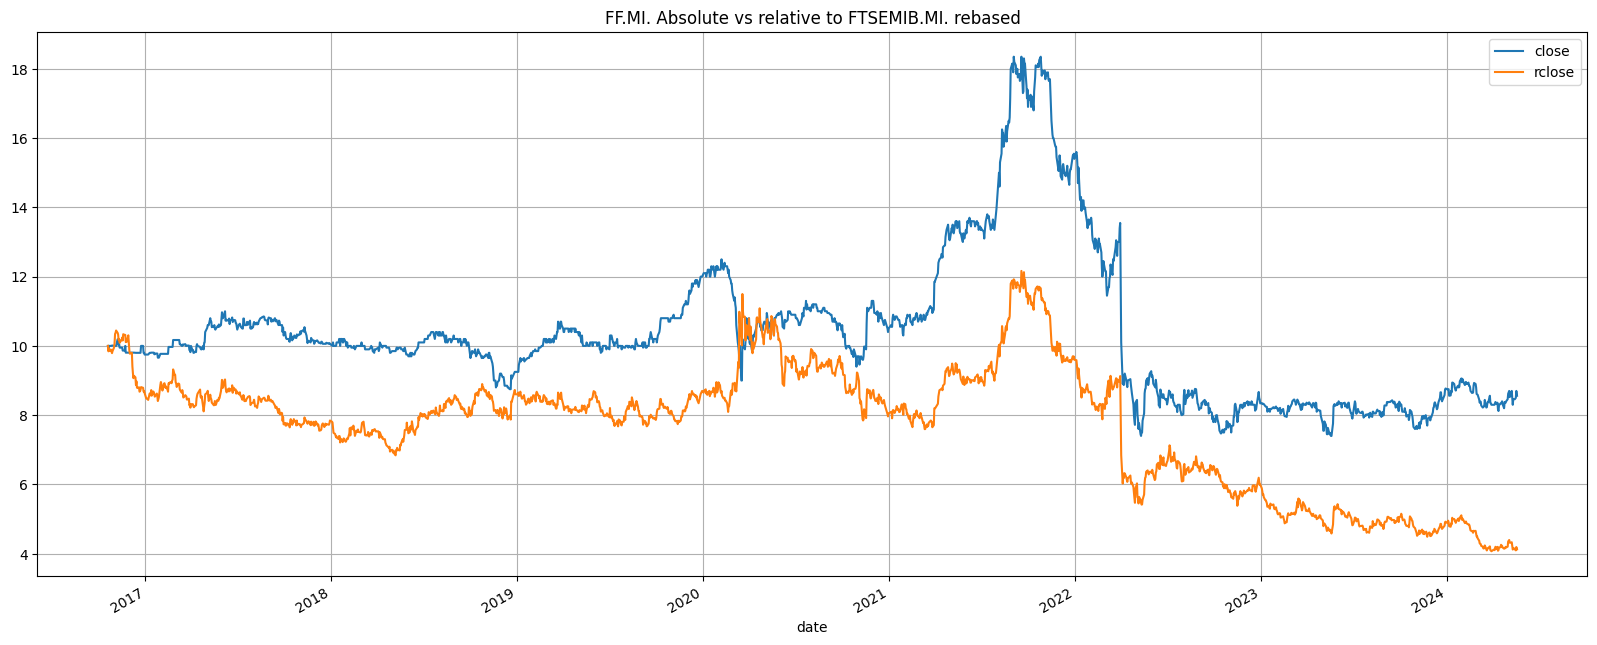

In [3]:
plot_abs_rel(df, ticker, bm_df, bm_name)

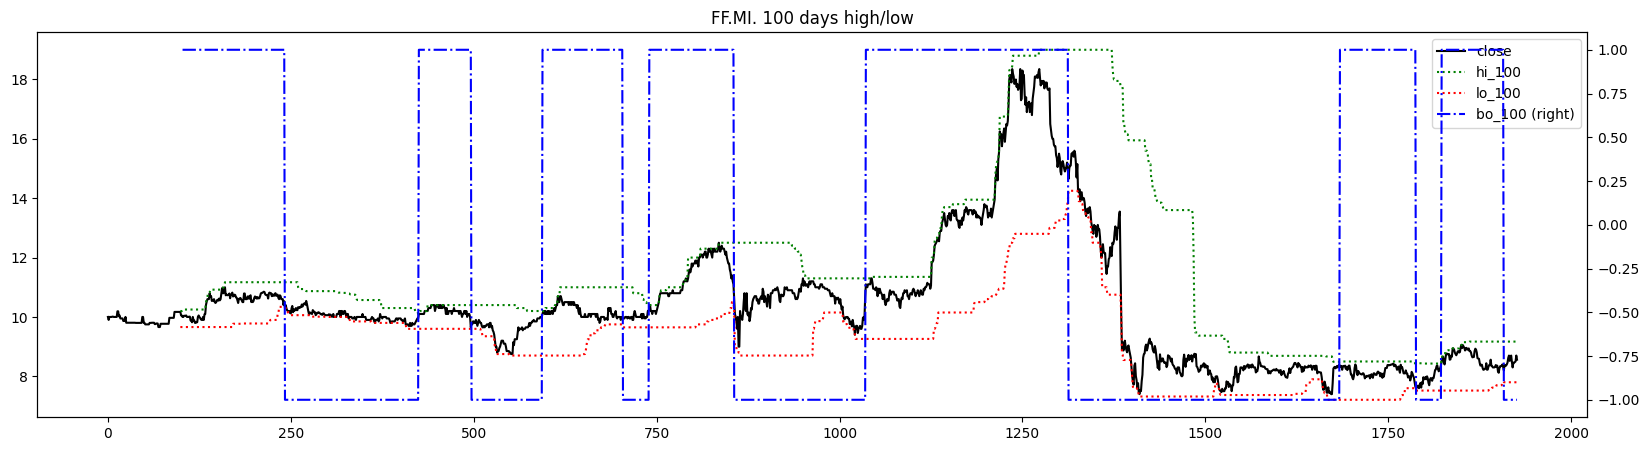

In [4]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

In [5]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

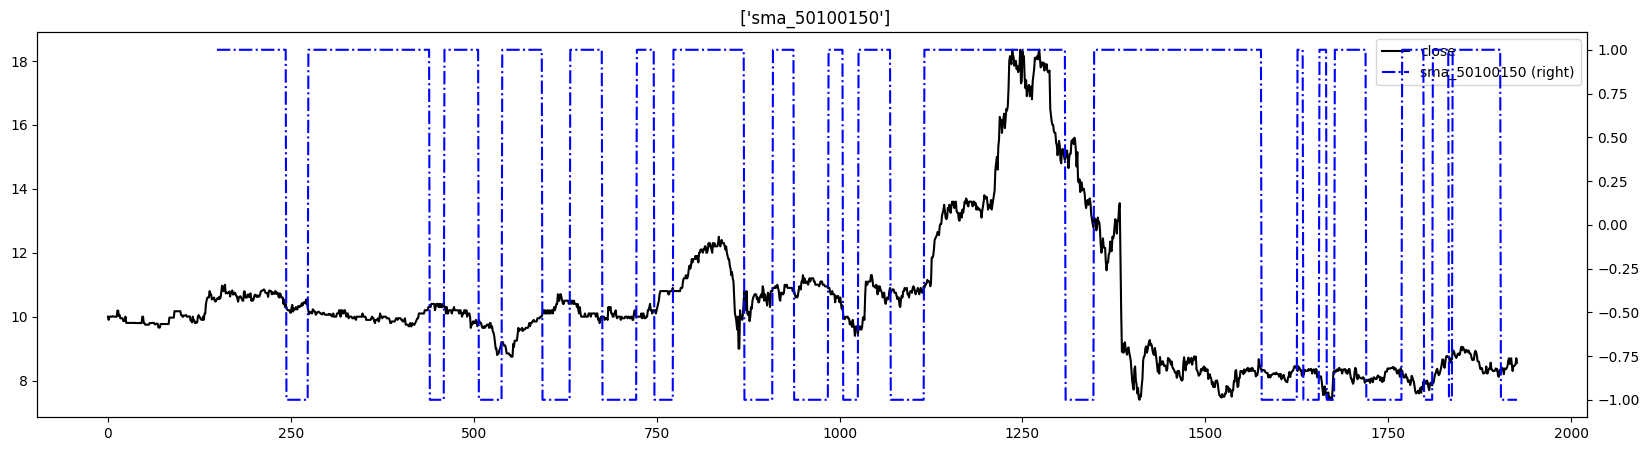

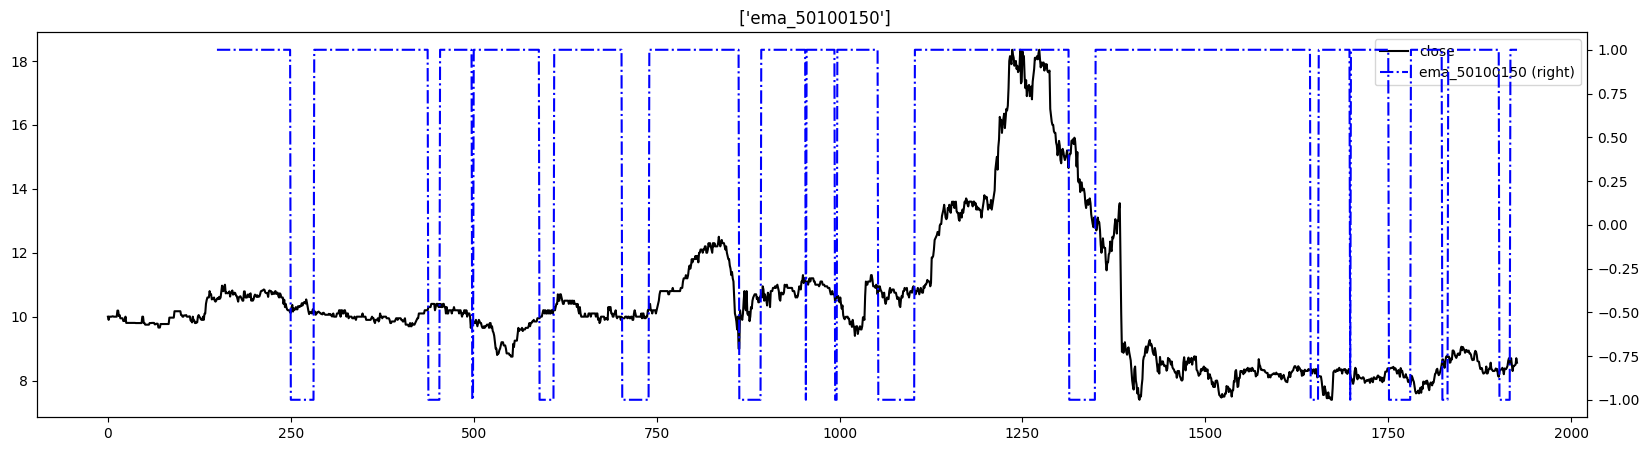

In [6]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

In [7]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

In [8]:
plot_regime_abs(df_fc, ticker)

1
1


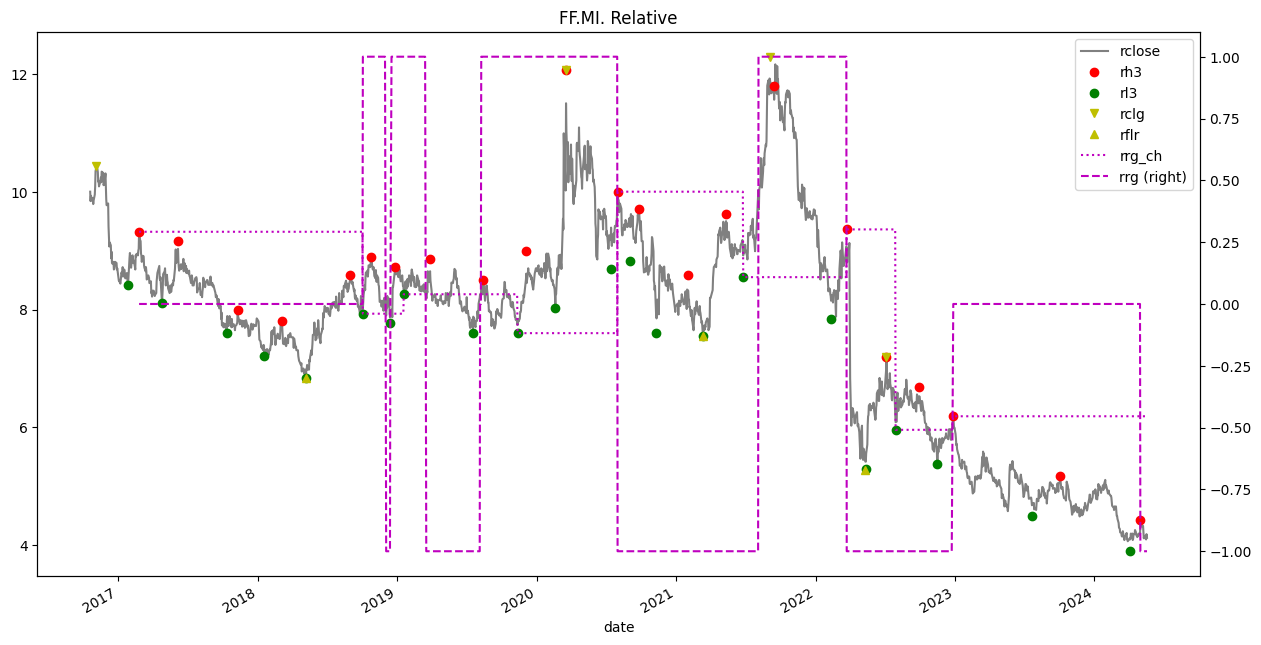

In [9]:
plot_signal_rel(df_fc, ticker)

1
1


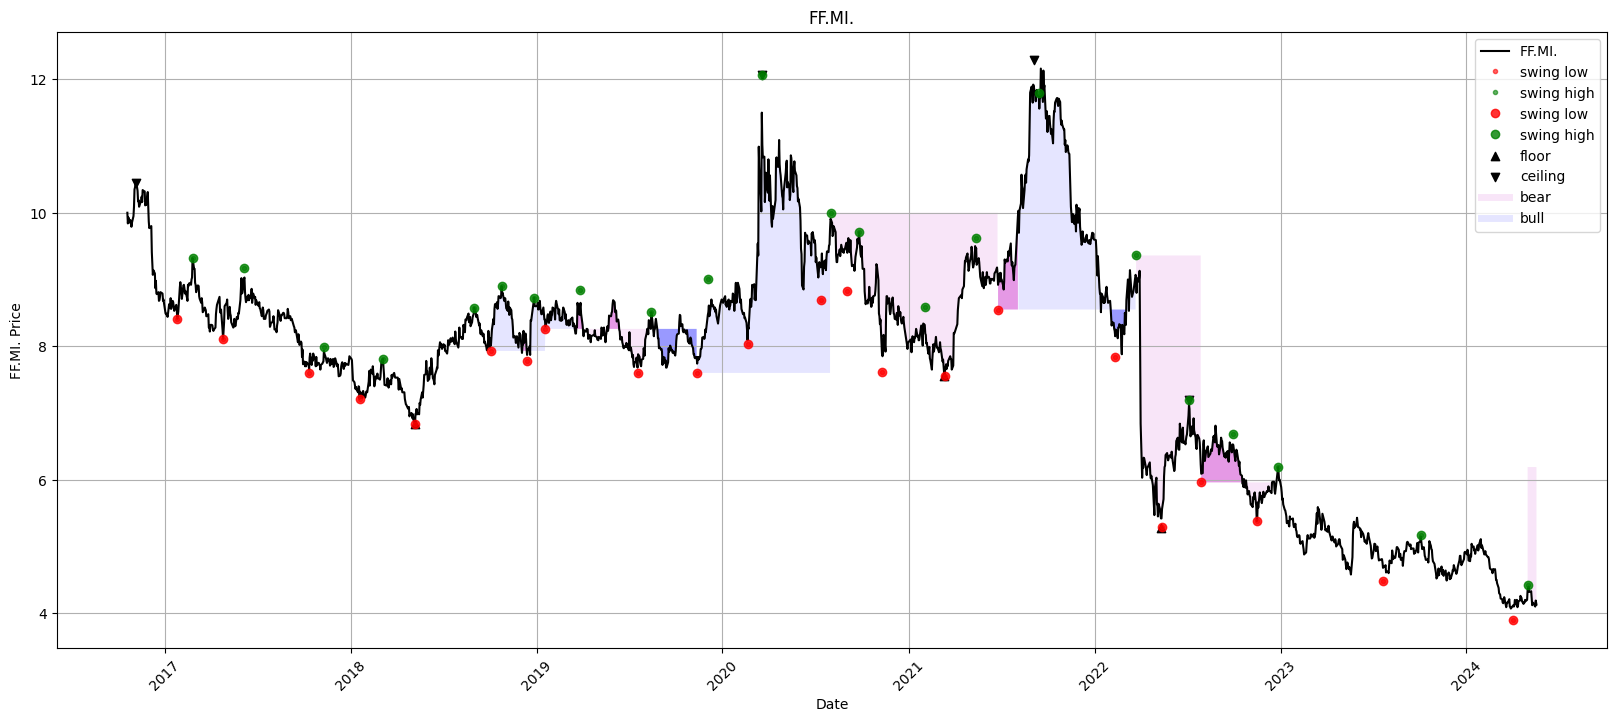

In [10]:
plot_regime_rel(df_fc, ticker)

In [11]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [12]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [13]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [14]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                 8.56       8.78  0.622372
ema                      8.56       7.80 -0.300350
floor_ceiling            8.56       8.78  0.224473
floor_ceiling_relative   8.56       8.78  0.214633
sma                      8.56       8.78 -0.278284
turtle                   8.56       8.60  1.337454

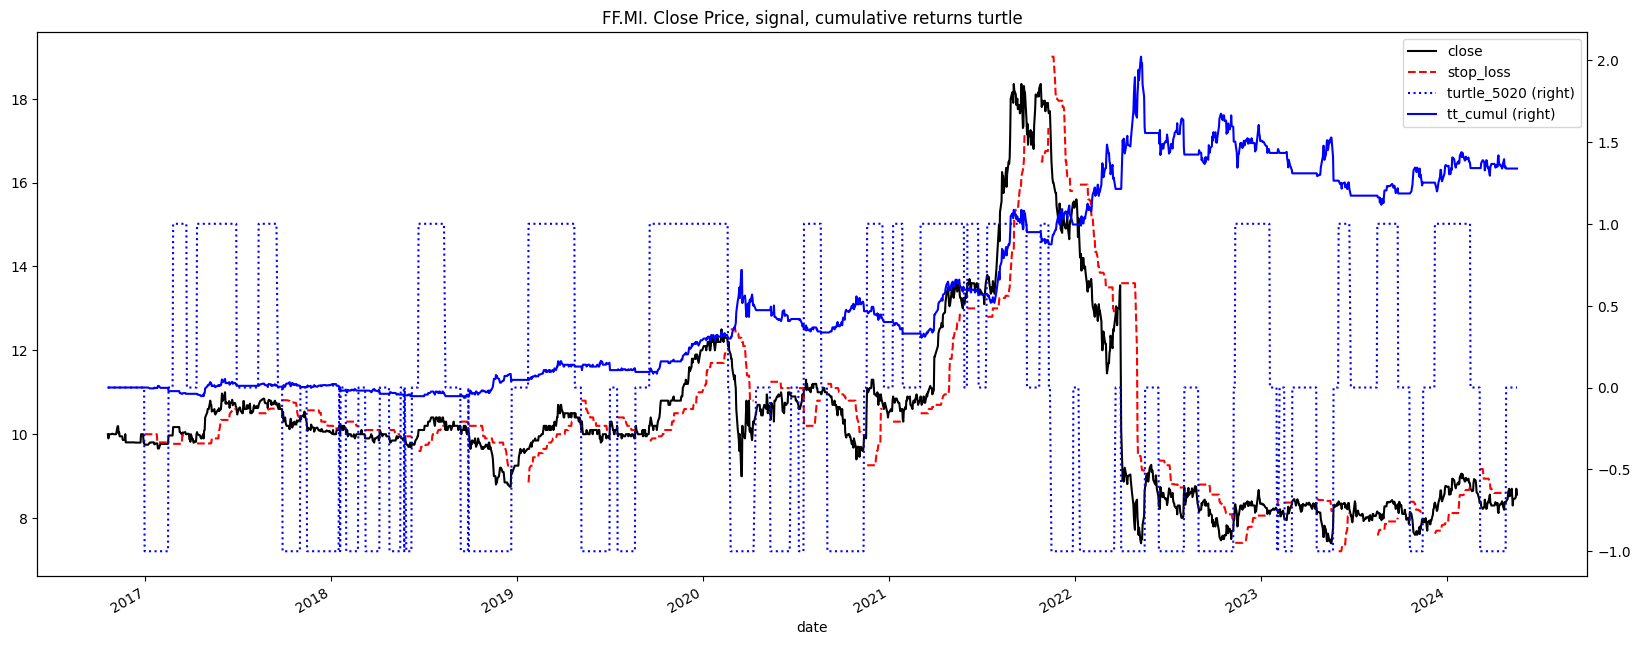

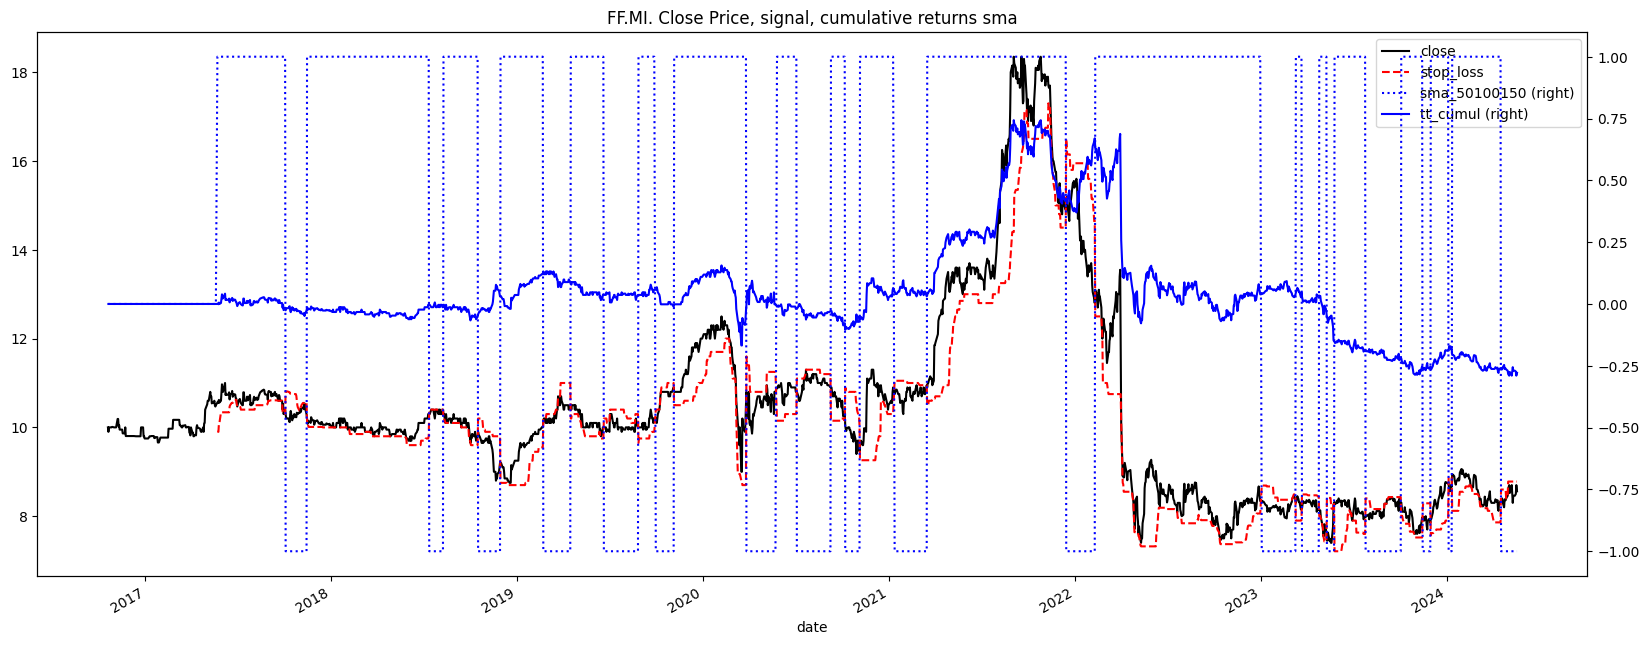

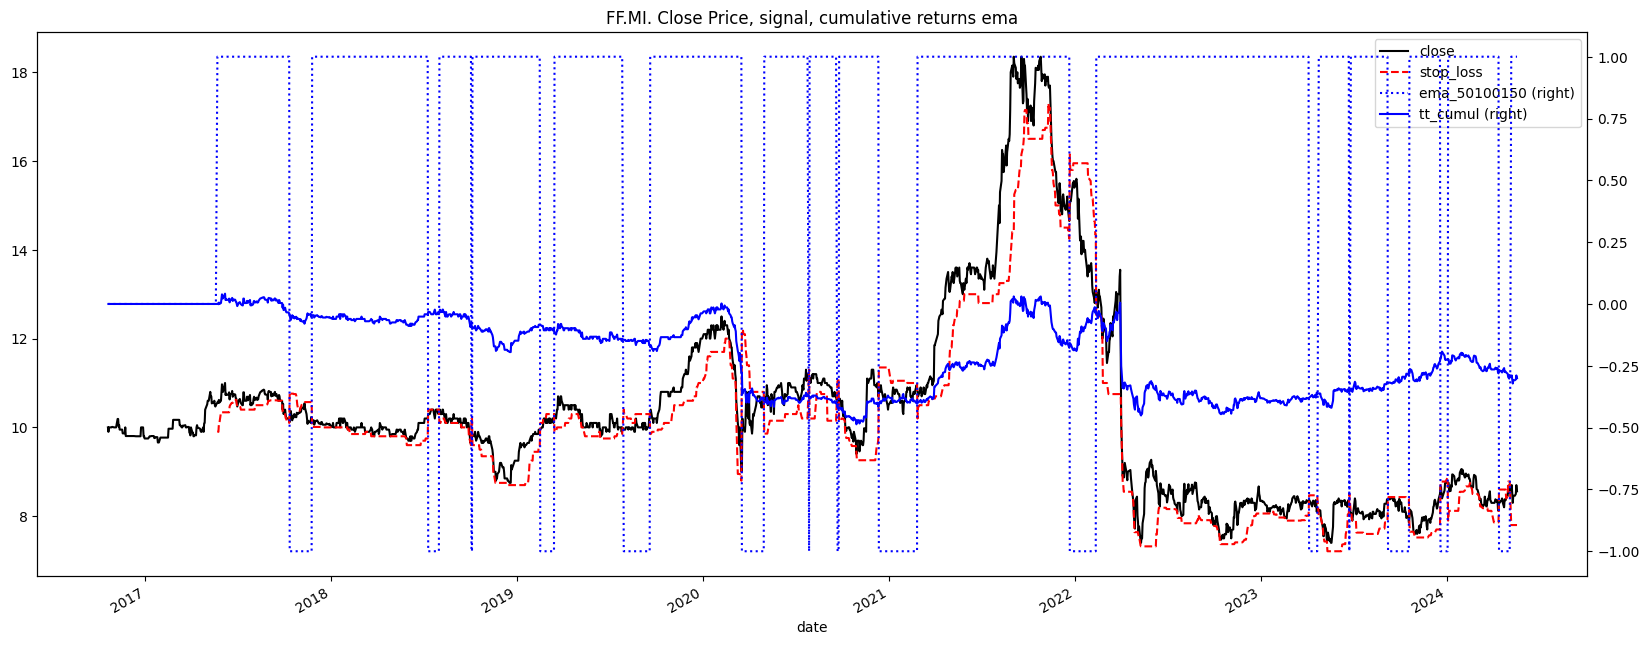

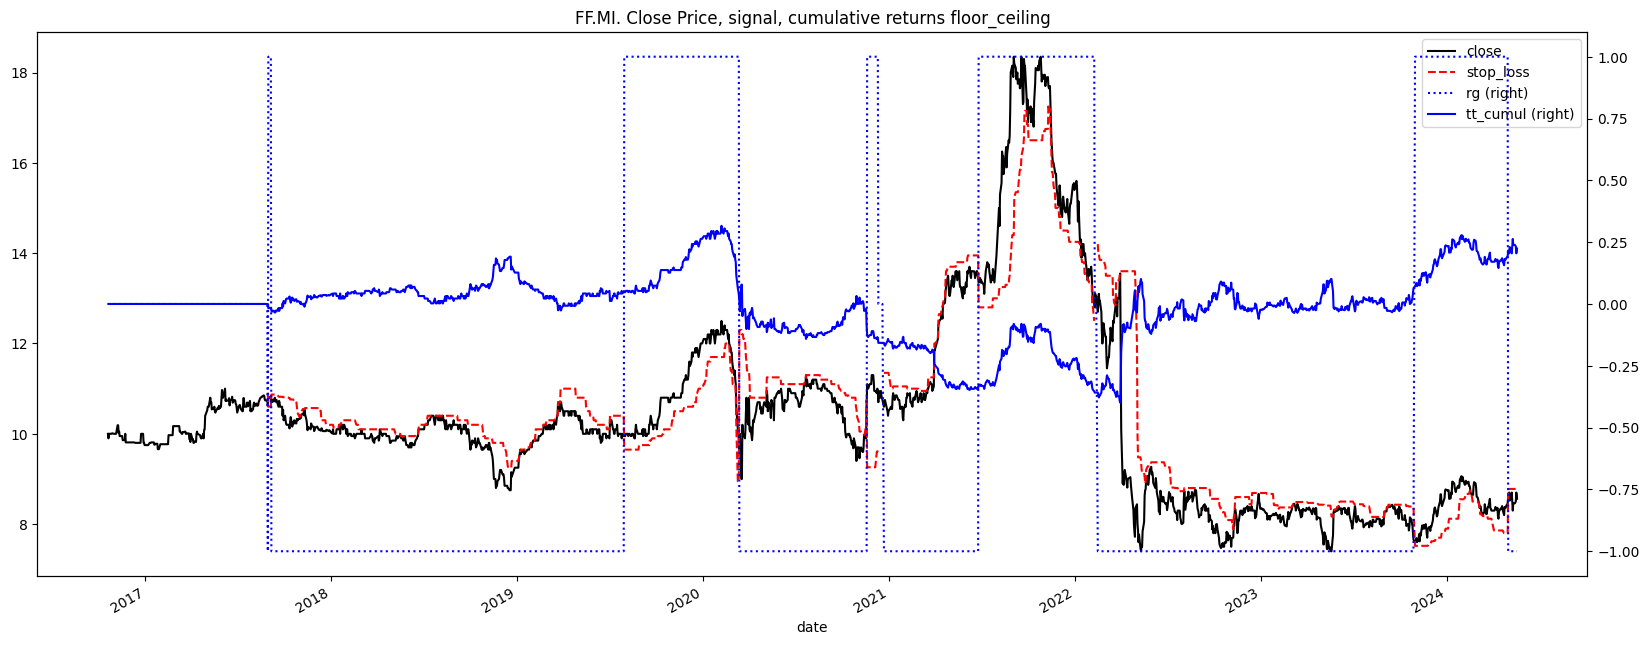

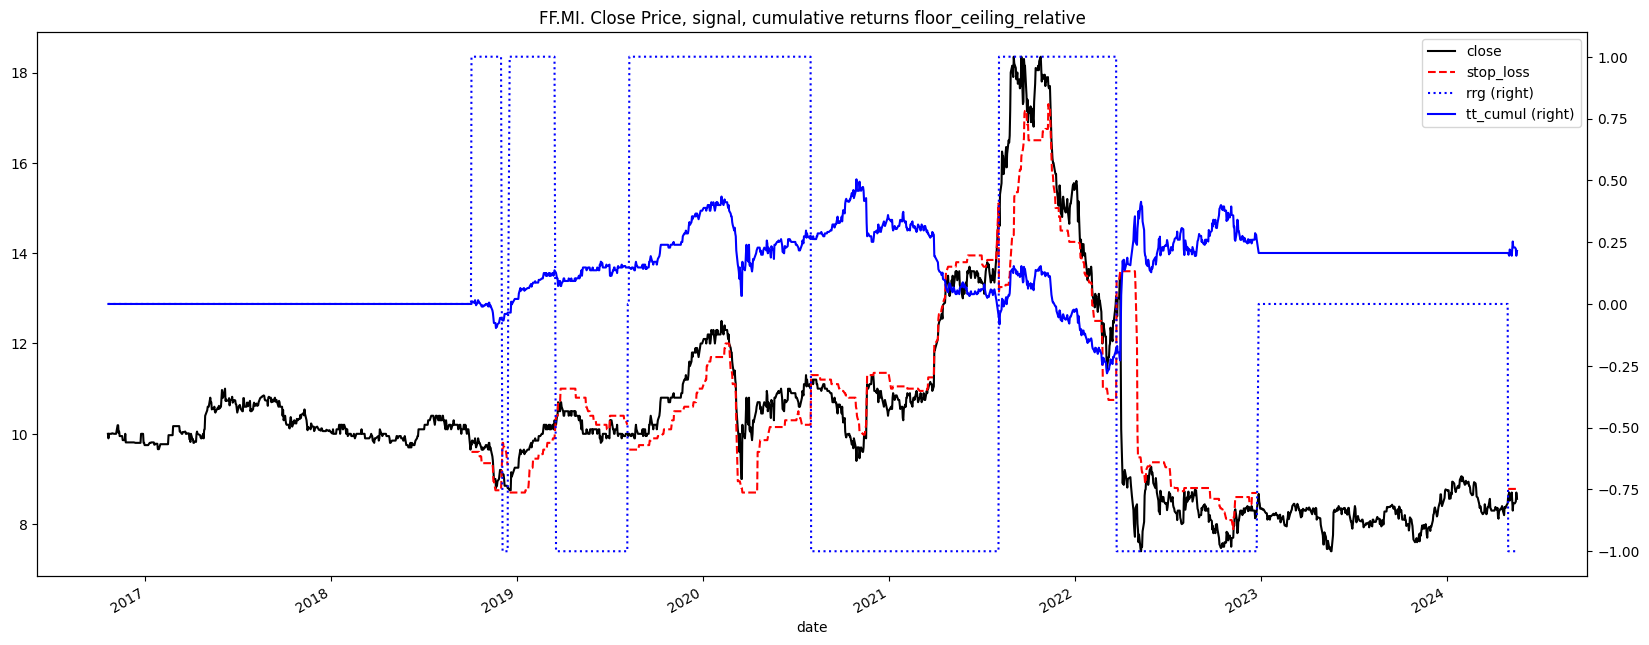

In [15]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

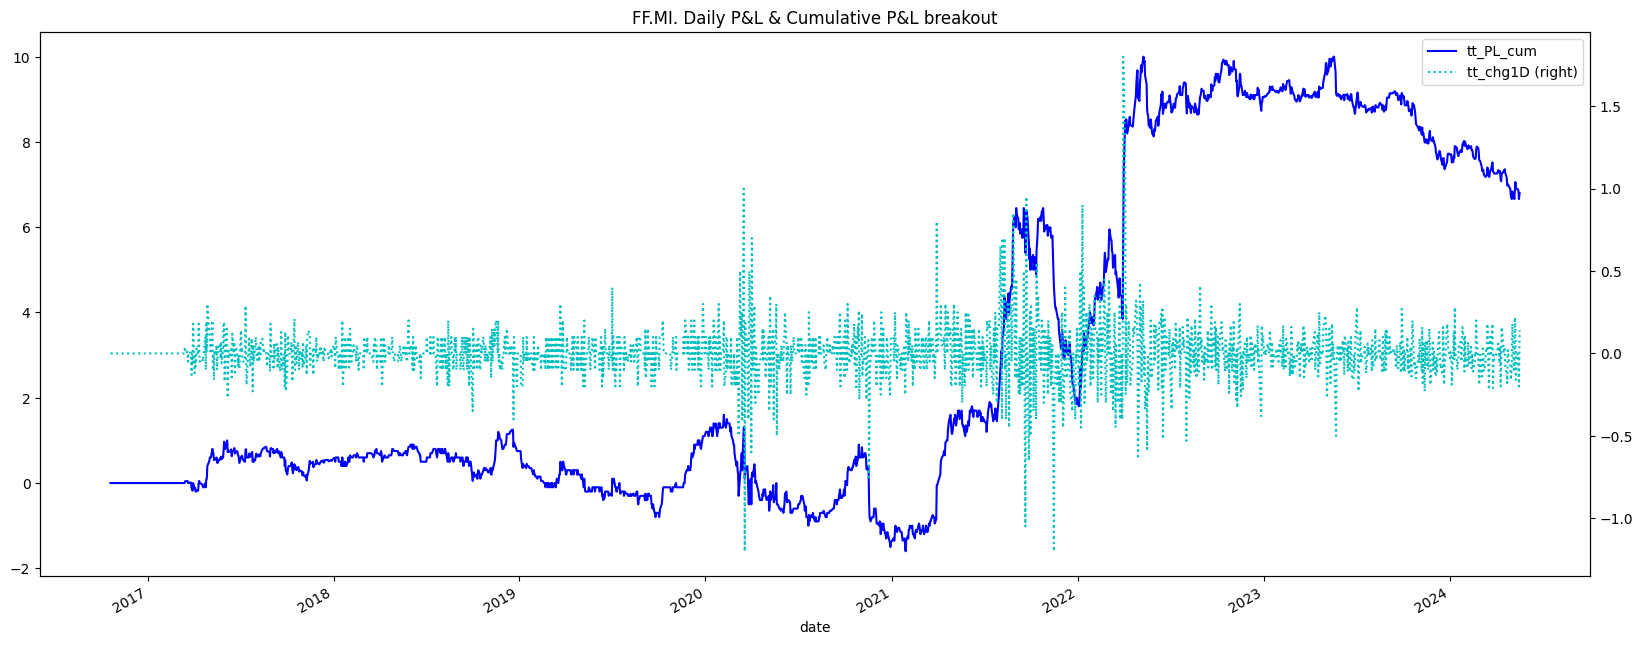

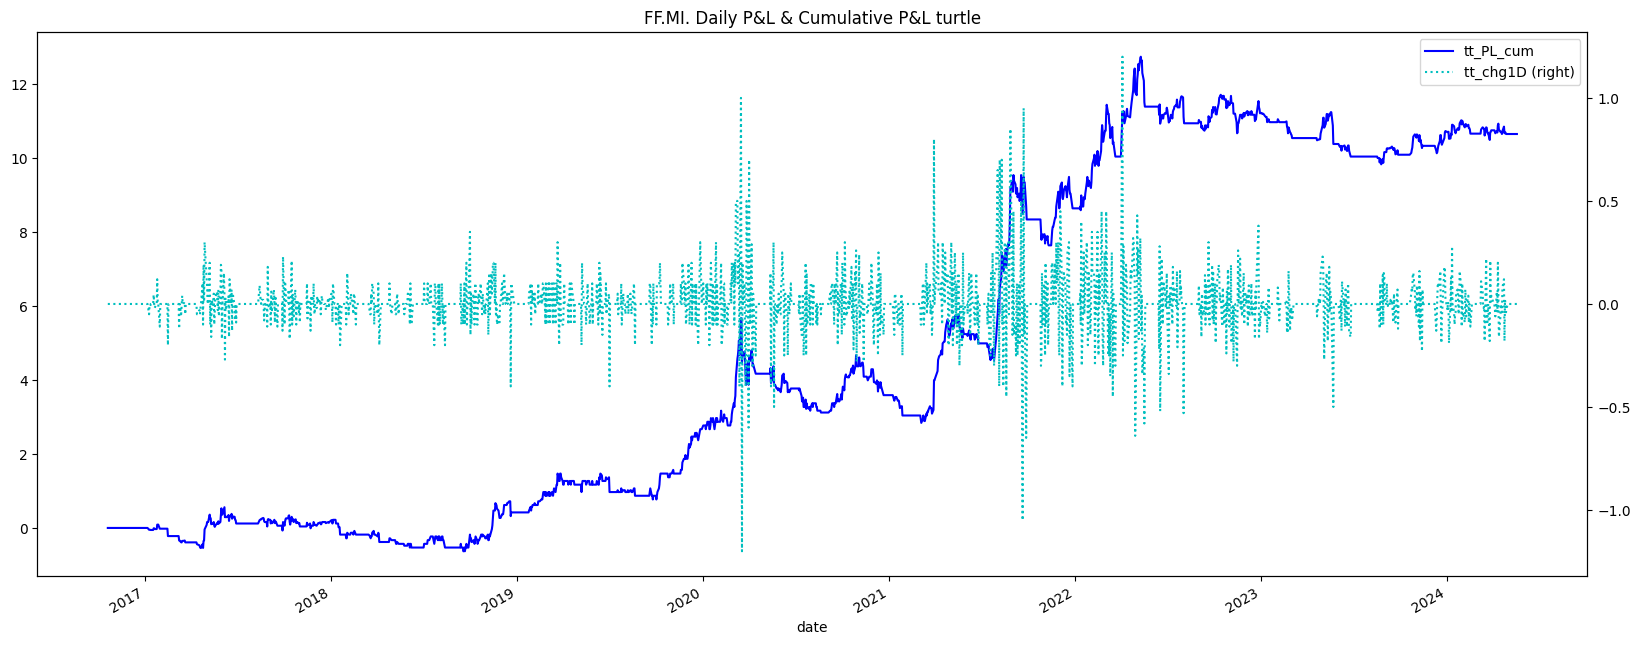

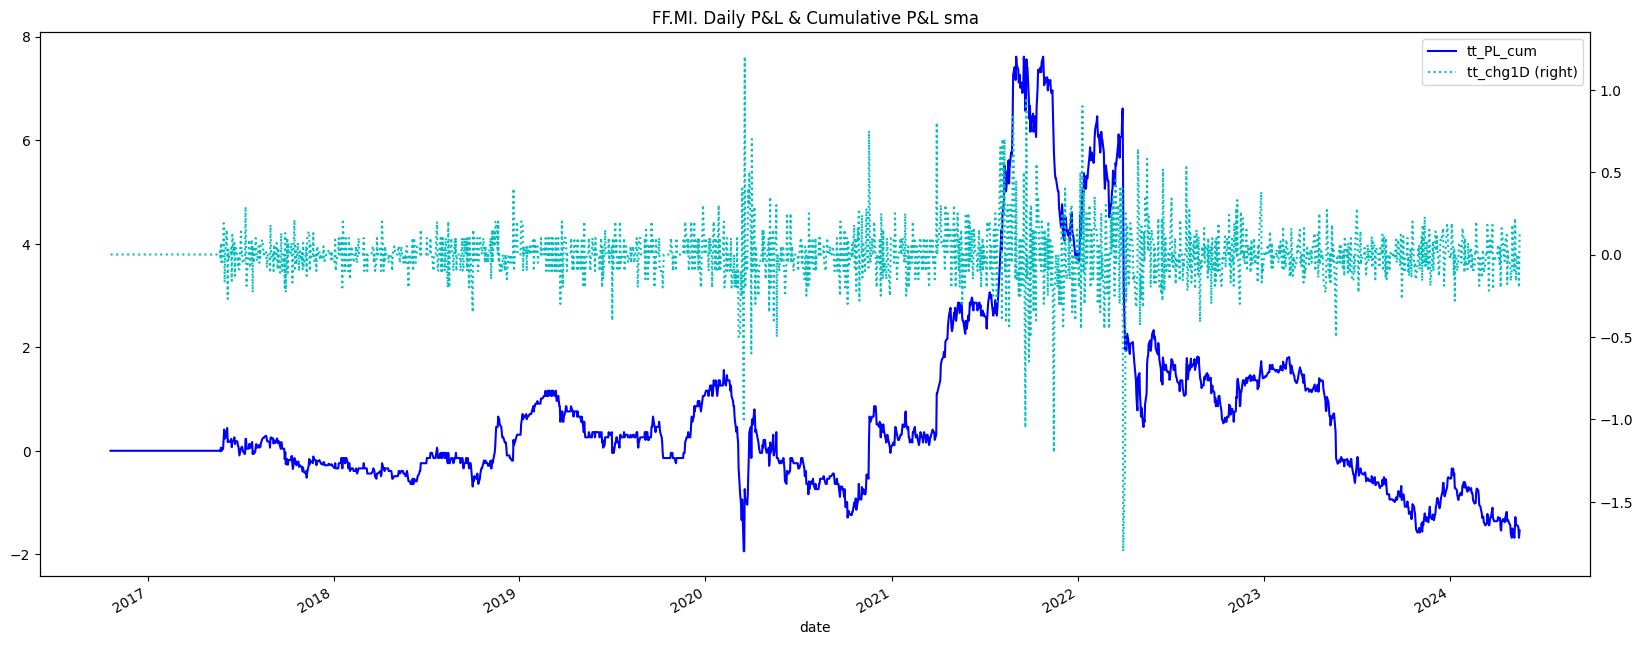

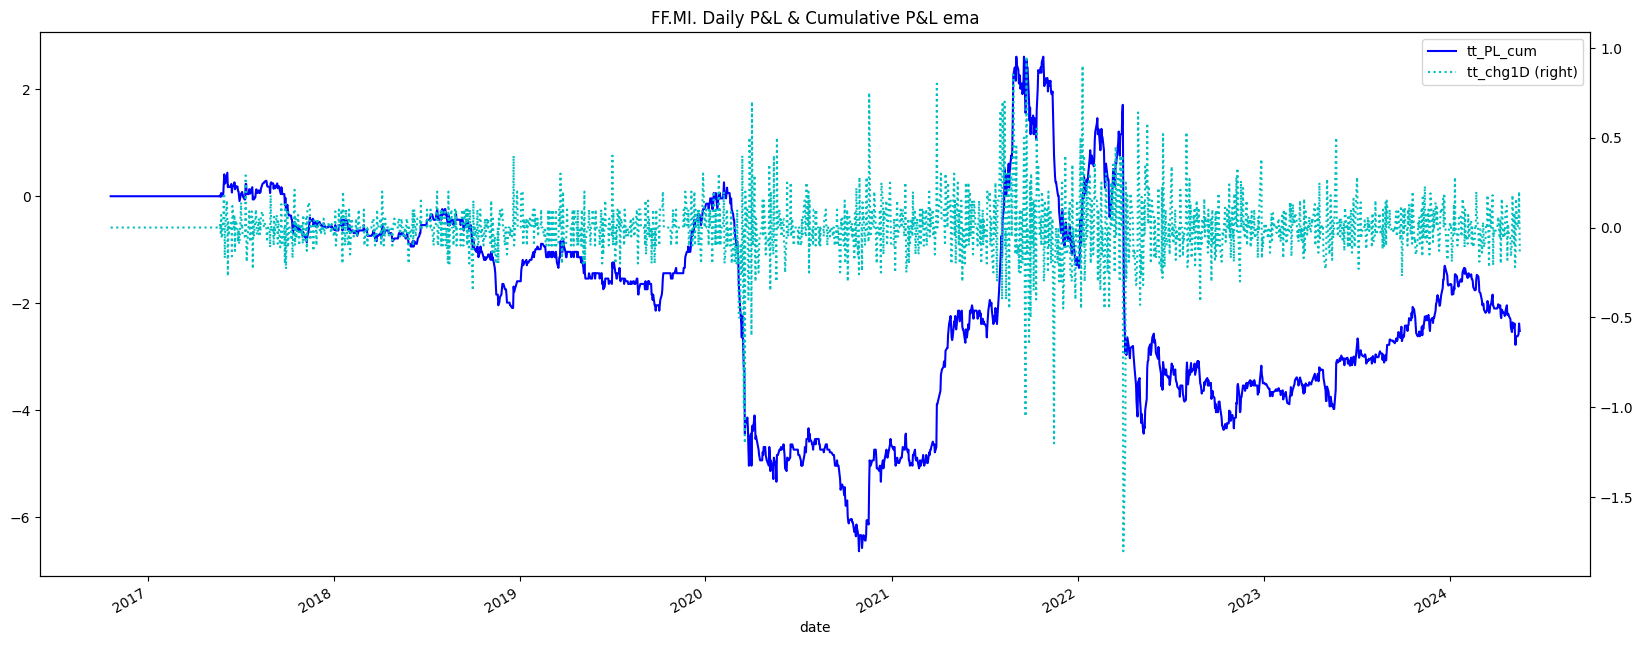

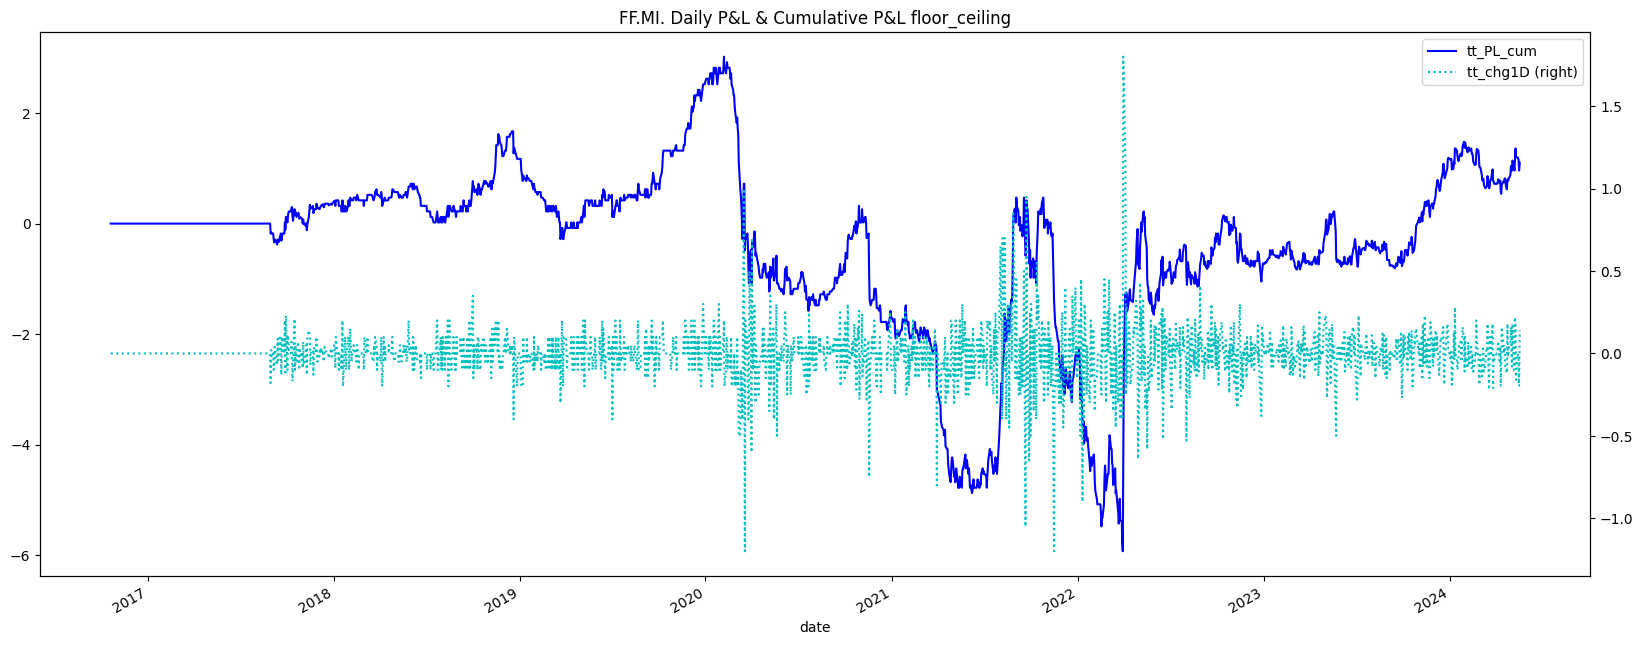

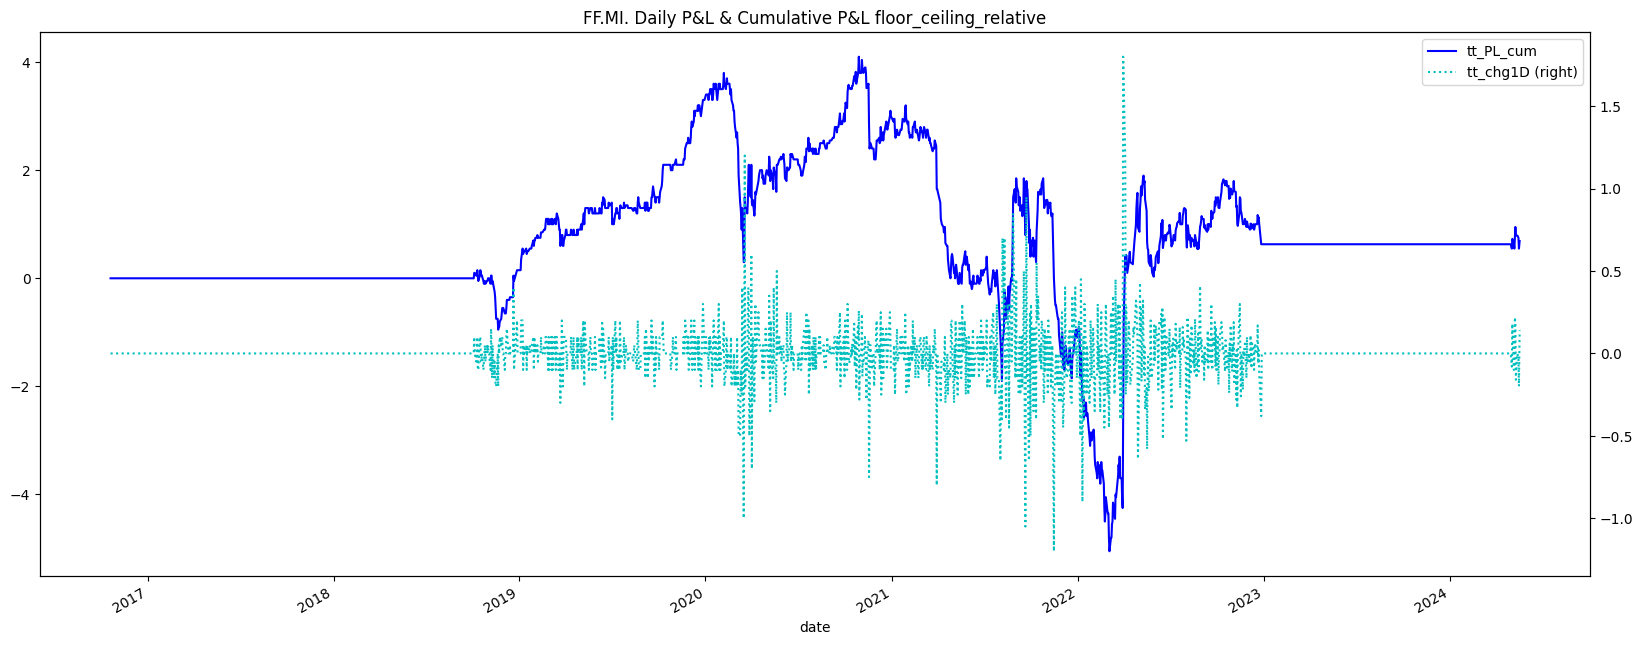

In [16]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [17]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy        kelly
method                                                                 
breakout                   -0.000113             -0.000123    -5.920160
ema                        -0.000499             -0.000509   -26.509191
floor_ceiling               0.000650              0.000640    33.714780
floor_ceiling_relative      0.000729              0.000729  1121.335533
sma                        -0.000247             -0.000256   -12.911142
turtle                      0.001058              0.001055   125.434122

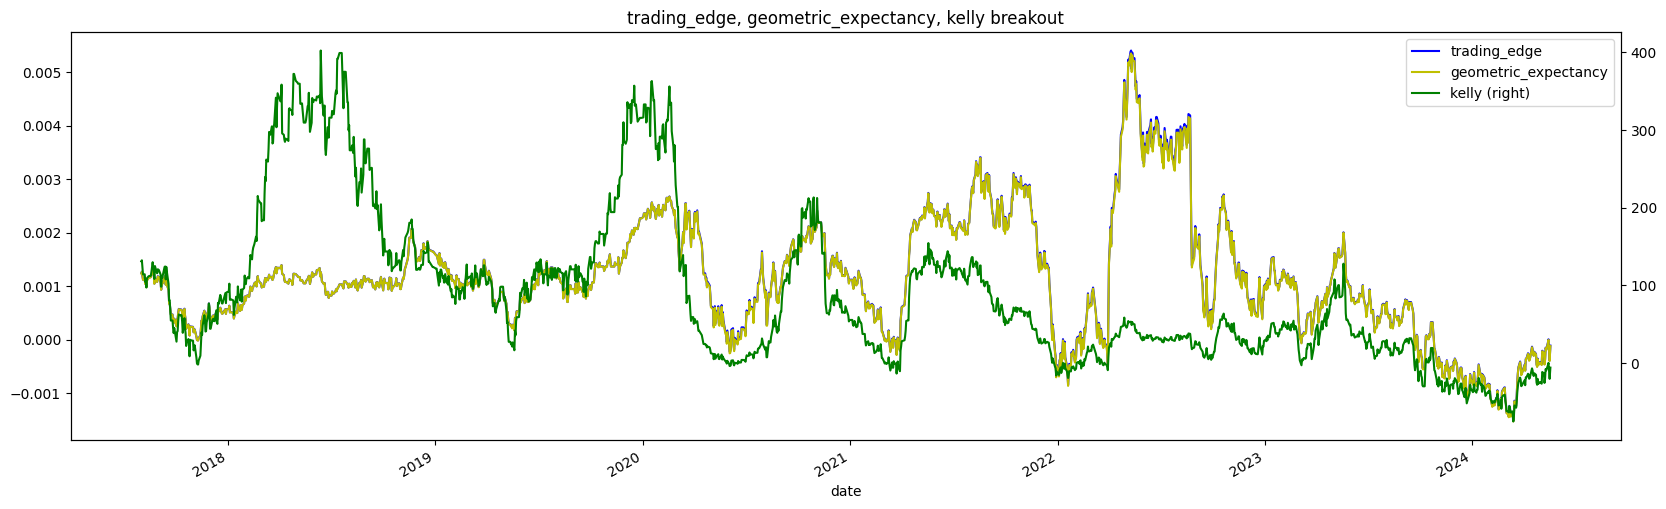

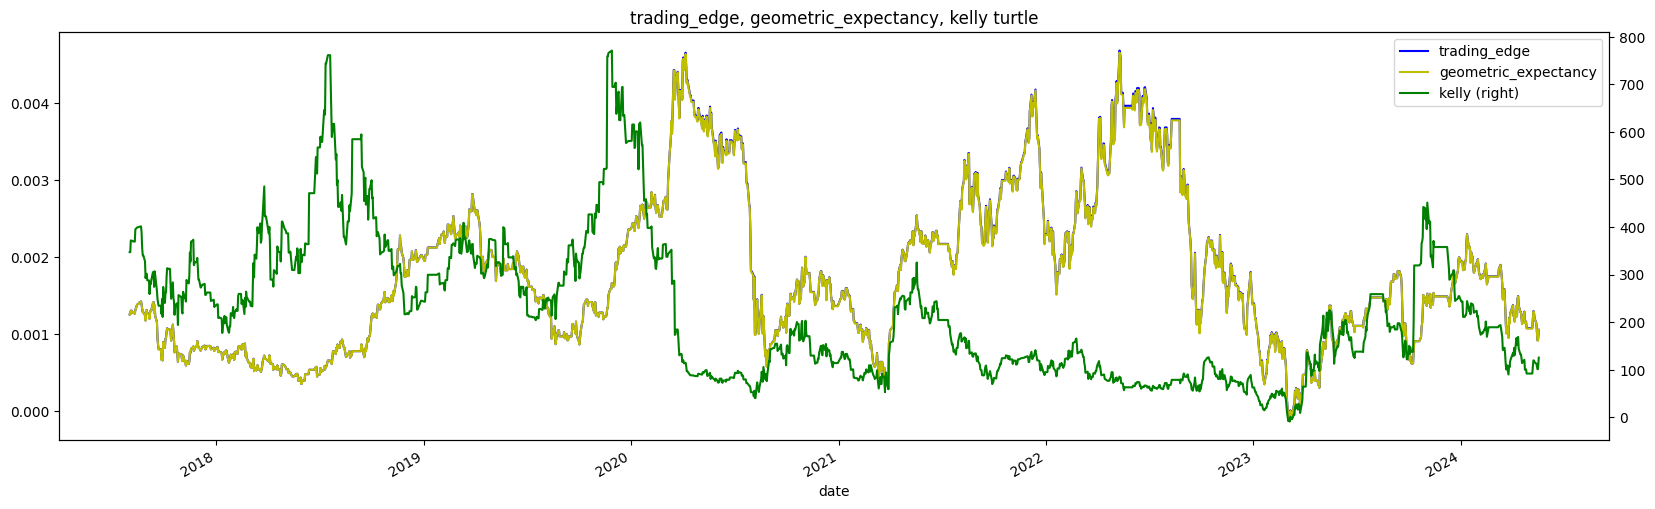

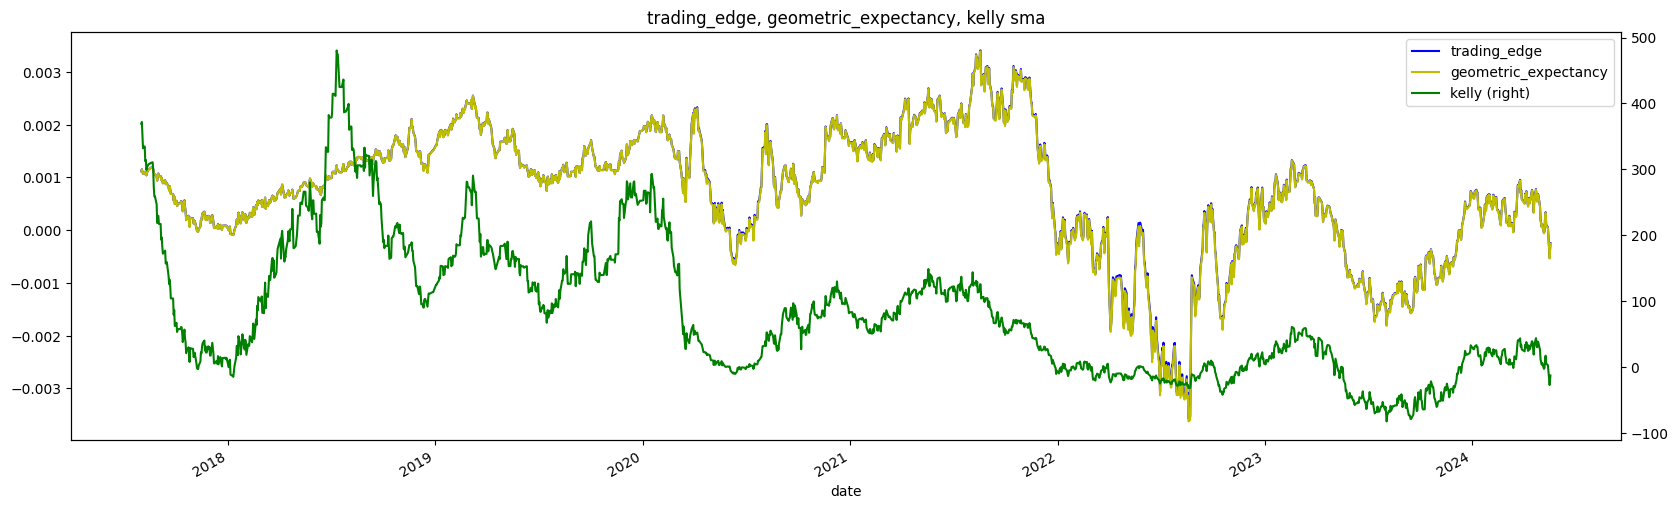

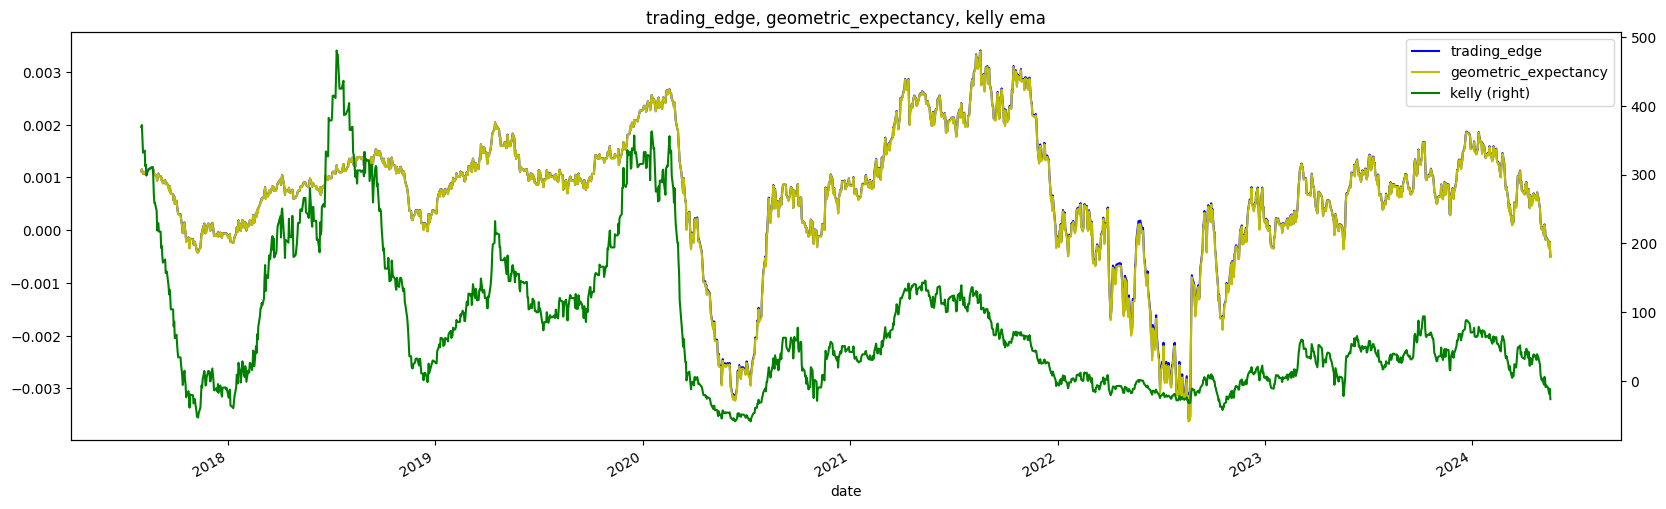

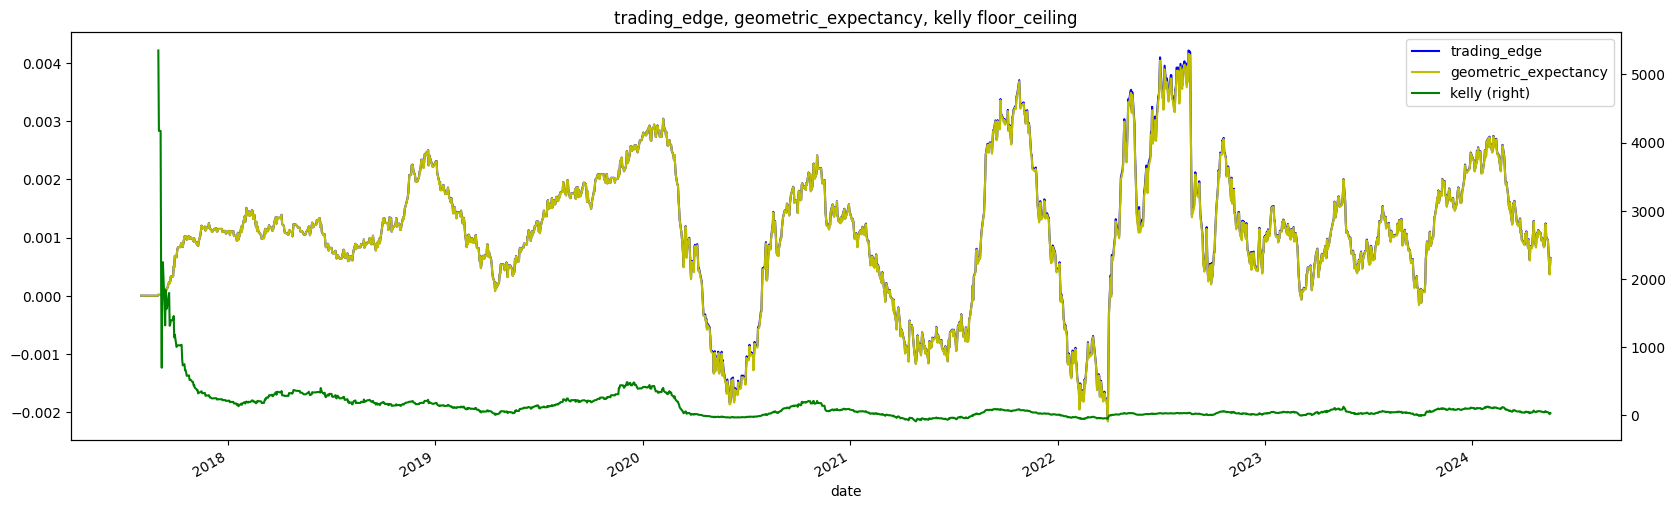

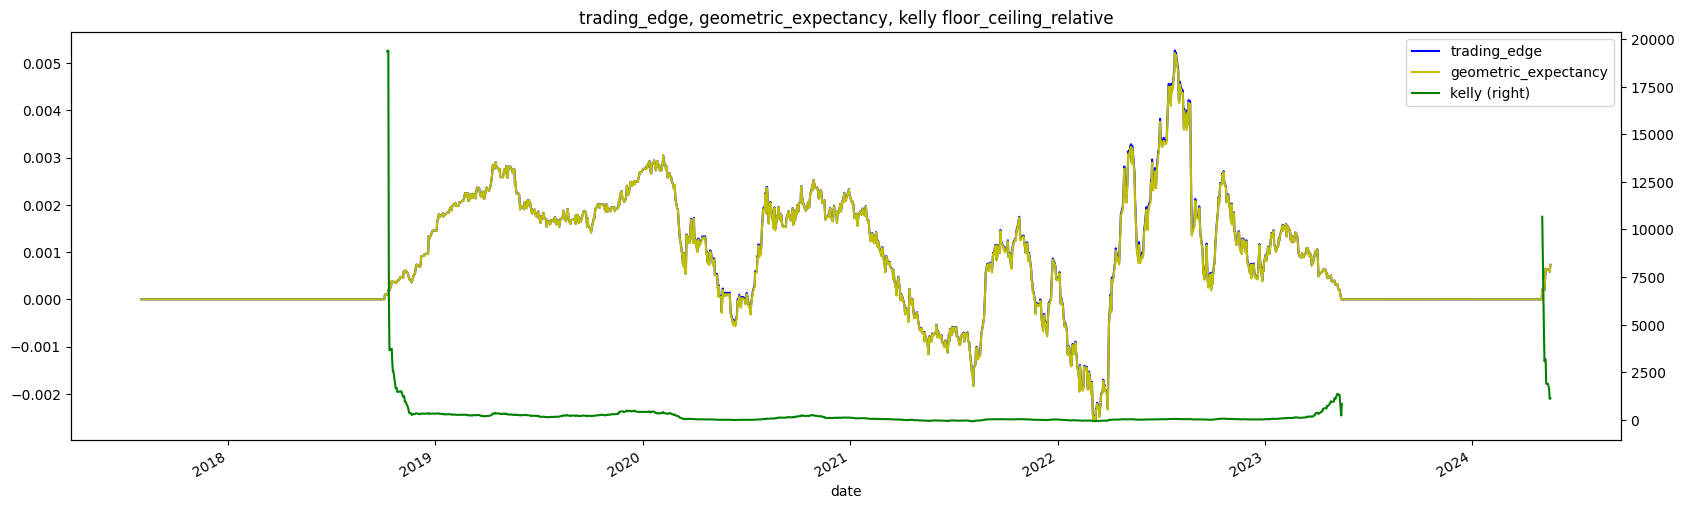

In [18]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [19]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [20]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [21]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [22]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant        concave         convex  \
method                                                                
breakout                114279.994392  121759.991455  121759.991455   
ema                      98235.995674   97227.993202   97227.993202   
floor_ceiling           103398.000000  105262.000000  105262.000000   
floor_ceiling_relative  113727.000000  119012.000000  111534.000000   
sma                      98922.000694   98306.001091   98306.001091   
turtle                  104072.009897  105254.014349  101912.011957   

                         equal_weight  tt_PL_cum_fx  
method                                               
breakout                103399.998665      6.799997  
ema                      98991.997528     -2.520006  
floor_ceiling            99822.000000      1.100000  
floor_ceiling_relative  100345.000000      0.690000  
sma                      99384.000397     -1.539999  
turtle                  103845.001125     10.650002

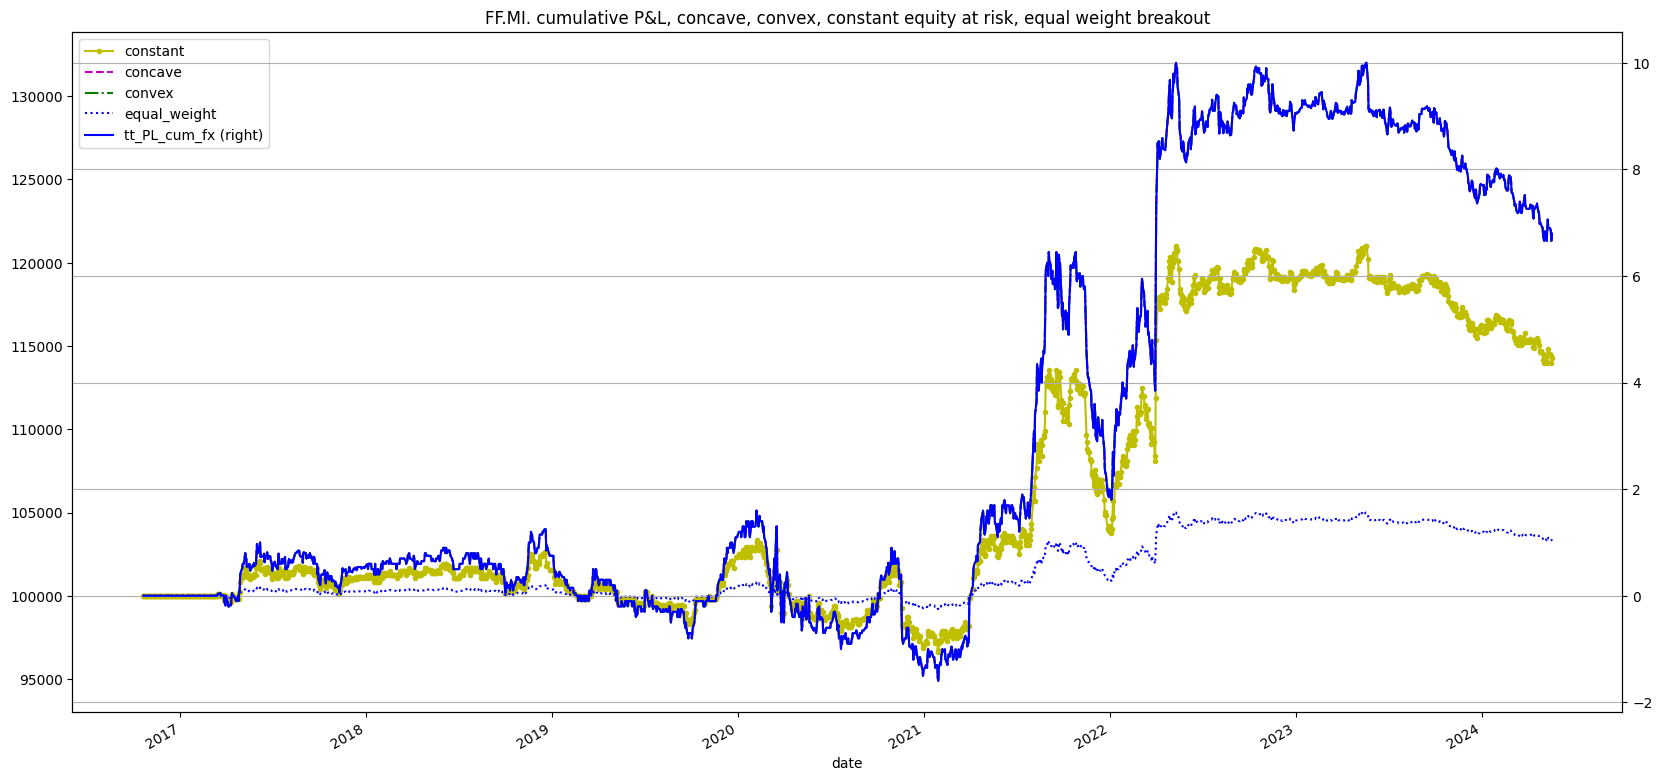

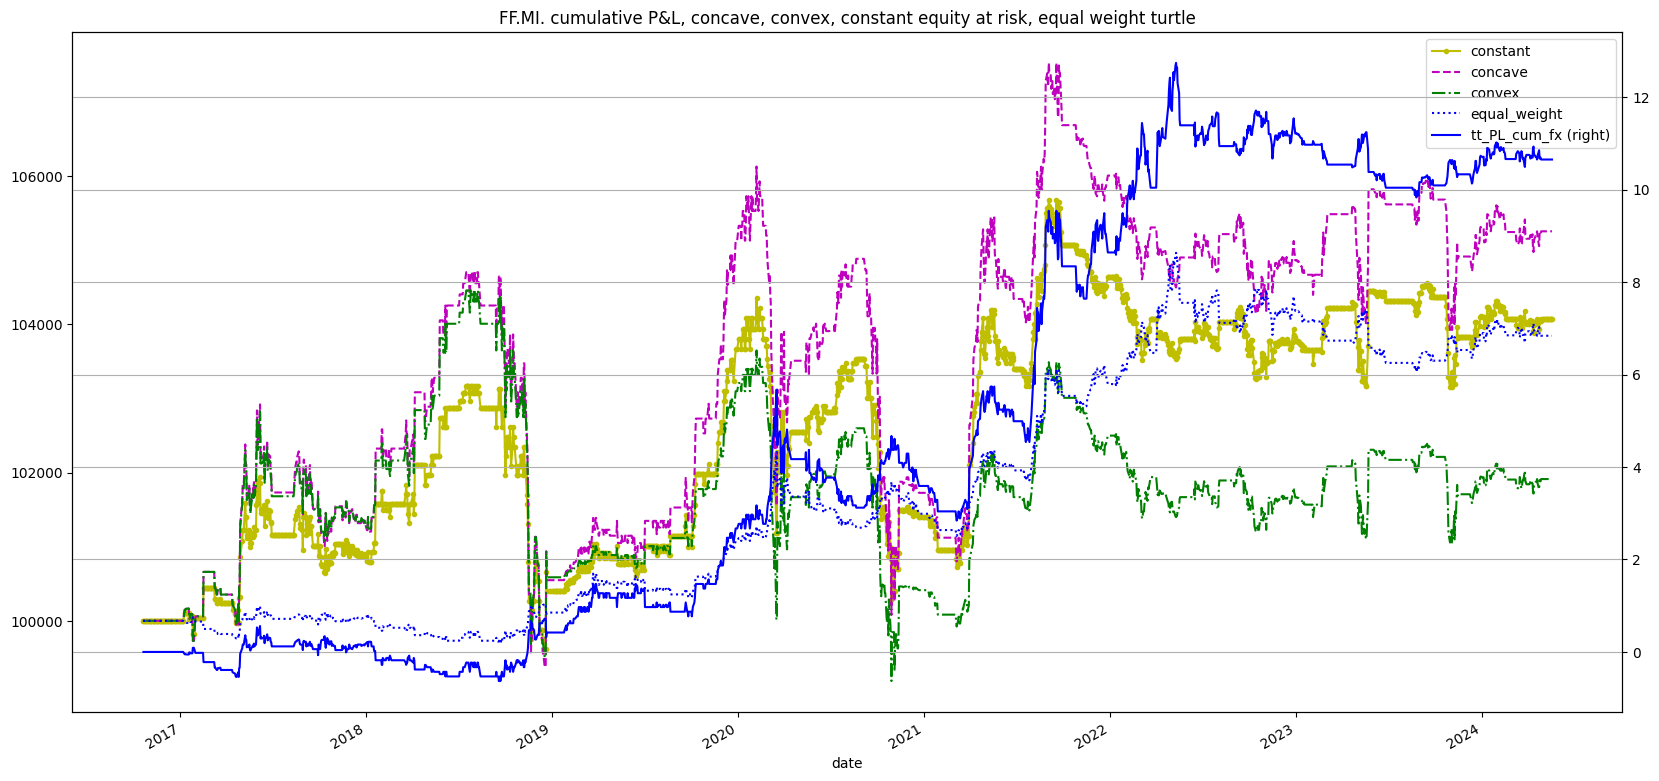

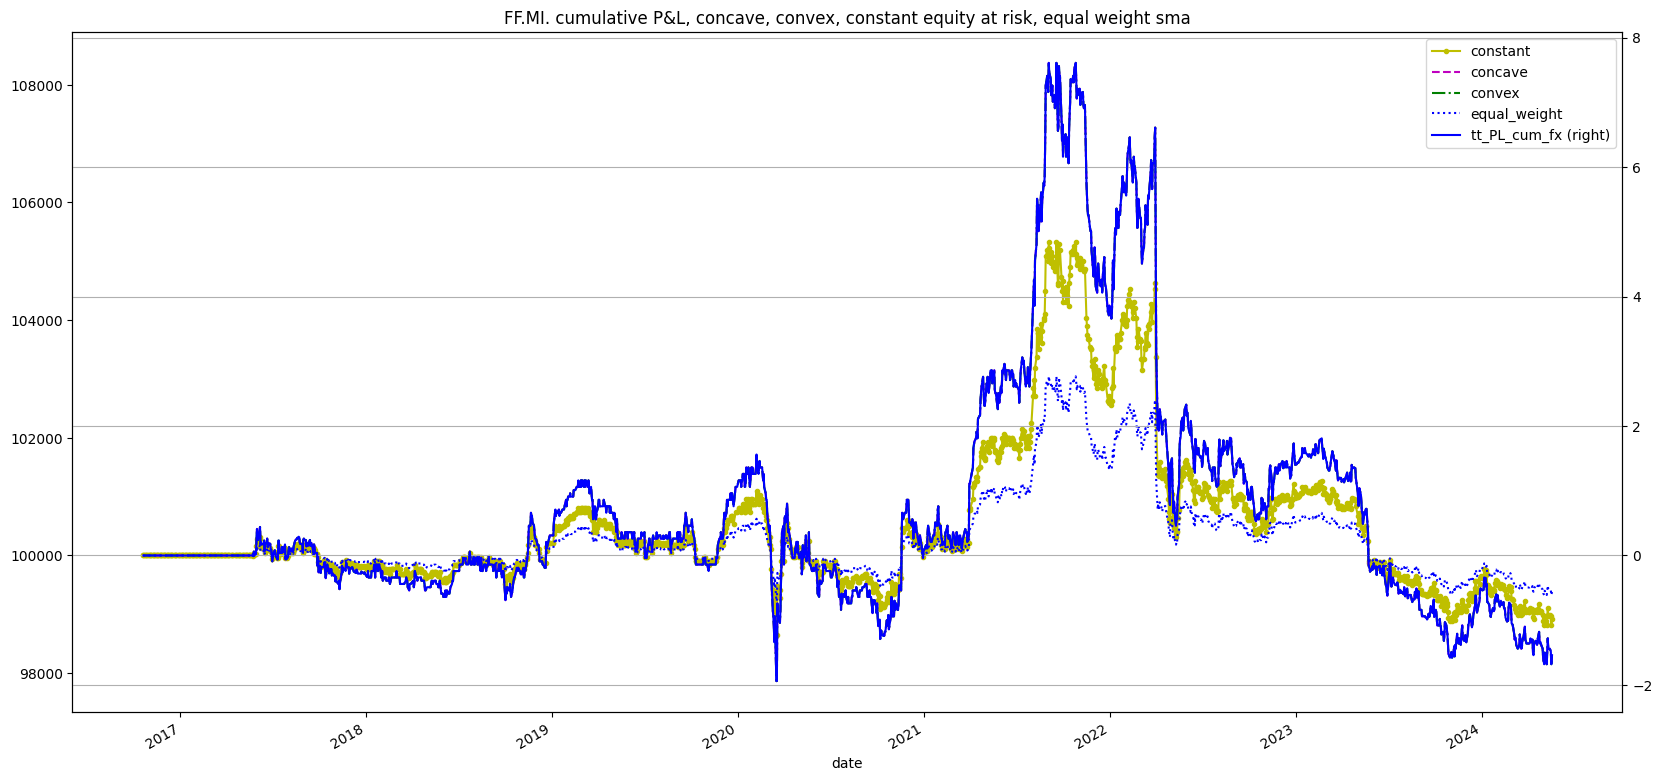

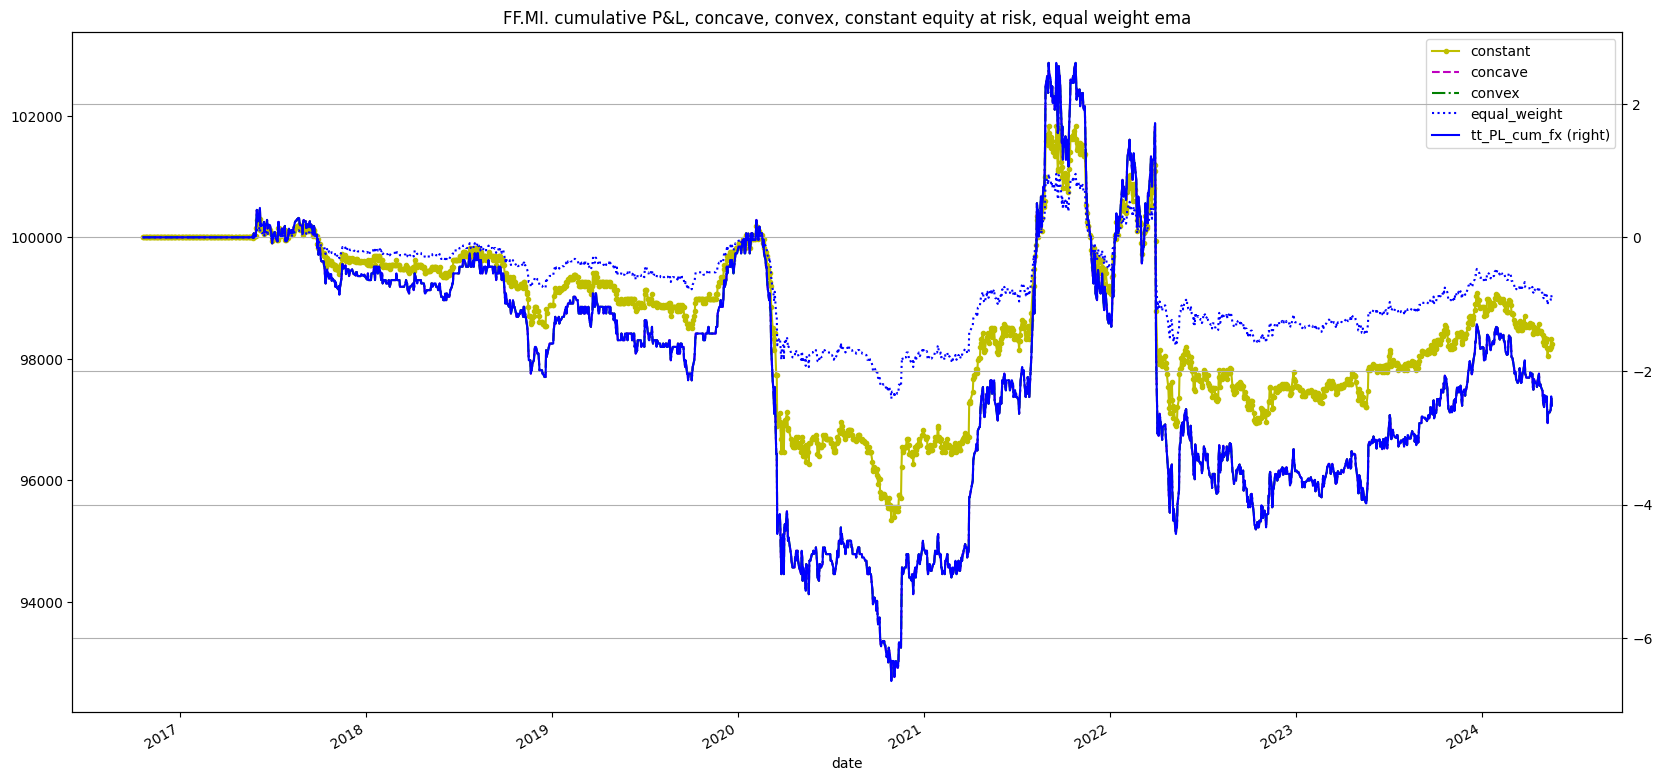

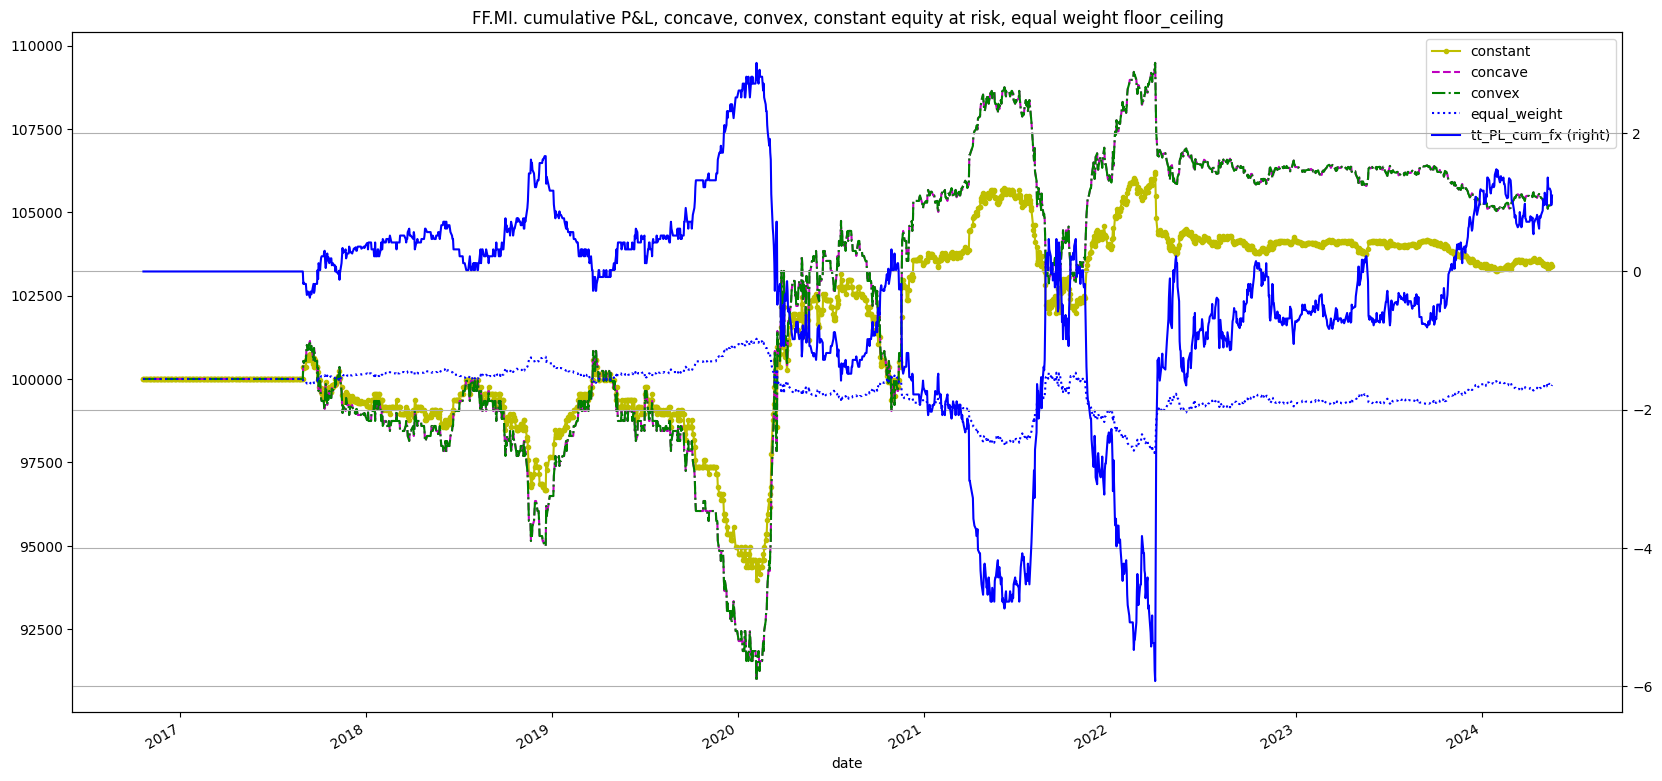

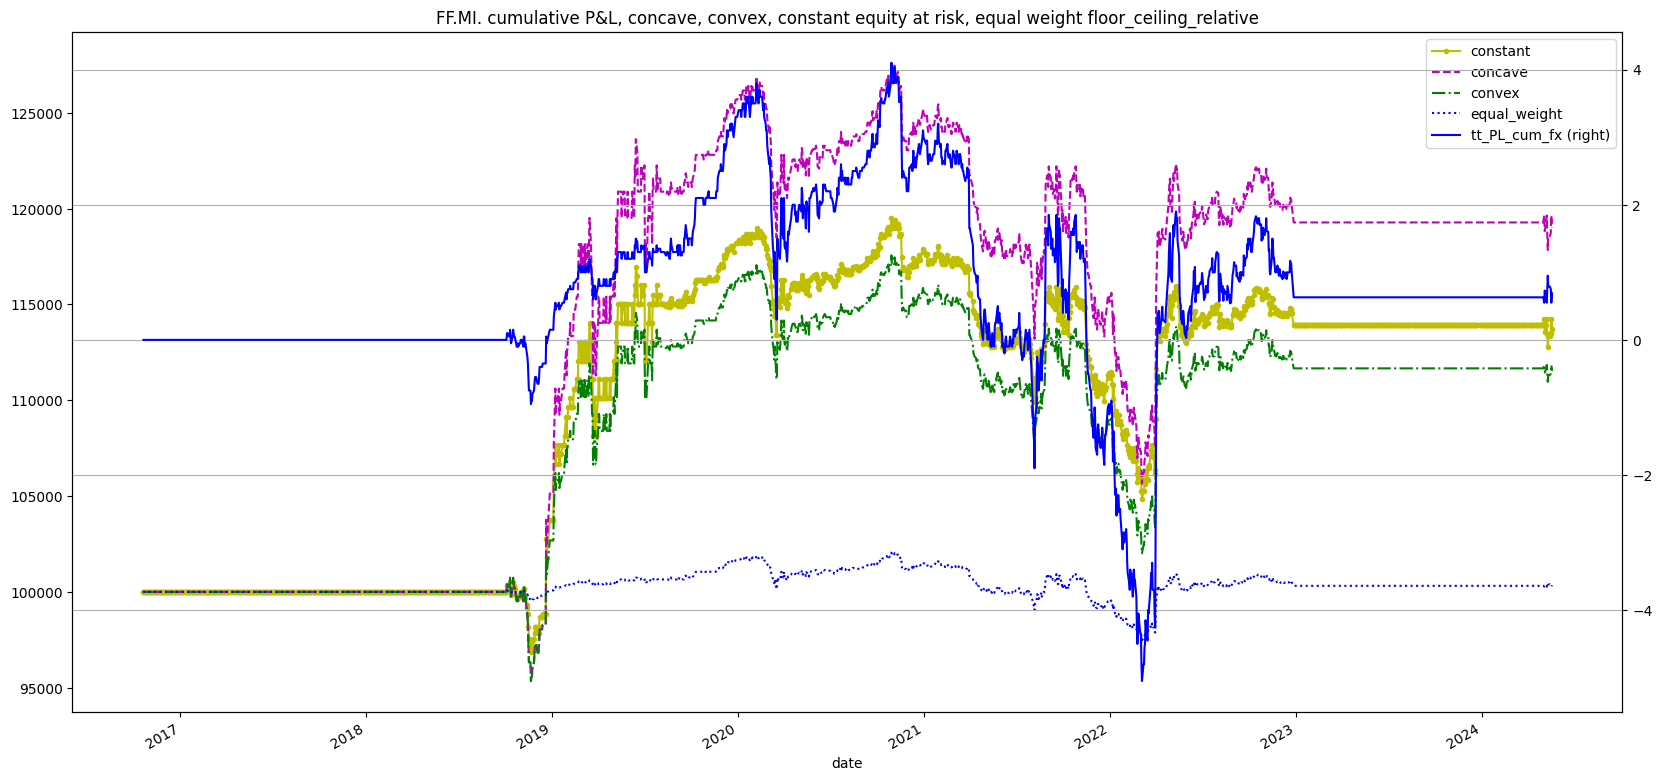

In [23]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [24]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                 -600.0   2100.0   3200.0   3200.0
ema                      -500.0    700.0   1100.0   1100.0
floor_ceiling            -500.0   -400.0   -600.0   -600.0
floor_ceiling_relative   -500.0  -3600.0  -4500.0  -2200.0
sma                      -500.0    700.0   1100.0   1100.0
turtle                   -600.0   -700.0  -1000.0   -700.0

In [25]:
df_fc.columns

Index(['date', 'volume', 'high', 'low', 'open', 'close', 'adj_close', 'ticker',
       'ropen', 'rhigh', 'rlow', 'rclose', 'hi1', 'lo1', 'hi2', 'lo2', 'hi3',
       'lo3', 'hi4', 'lo4', 'rt', 'rg', 'flr', 'clg', 'rg_ch', 'rh1', 'rl1',
       'rh2', 'rl2', 'rh3', 'rl3', 'rh4', 'rl4', 'rrt', 'rrg', 'rflr', 'rclg',
       'rrg_ch'],
      dtype='object')

In [26]:
df_fc[df_fc['clg'].notna()][['date', 'clg']].tail(1)

date   clg
1861 2024-02-13 08:00:00  9.17

In [27]:

df_fc[df_fc['flr'].notna()][['date', 'flr']].tail(1)

date   flr
1667 2023-05-11 07:00:00  7.21

In [28]:

df_fc[df_fc['hi3'].notna()][['date', 'hi3']].tail(1)

date   hi3
1914 2024-04-30 07:00:00  8.78

In [29]:
df_fc[df_fc['lo3'].notna()][['date', 'lo3']].tail(1)

date  lo3
1908 2024-04-22 07:00:00  7.8

In [30]:

price = 2.021
stop_loss = 1.61
qty = 1000
r_multiplier = 1.1
r_multiplier
pt = target_price(price, stop_loss, r_multiplier)
exit_qty = partial_exit(qty, r_multiplier)
print('target price', pt,'exit_quantity',exit_qty)

target price 2.4730999999999996 exit_quantity 909.090909090909


In [31]:
cost = 1.8945
price = cost * 1.08
qty * (cost - stop_loss) / (price - stop_loss)

652.4331514011832

In [32]:
average_true_range(df_fc,'high','low','close', n= 63)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1922    0.192222
1923    0.194762
1924    0.191746
1925    0.191746
1926    0.191746
Length: 1927, dtype: float64

In [33]:
df_fc.tail()

date  volume  high   low  open  close  adj_close ticker  \
1922 2024-05-13 07:00:00    1191  8.54  8.40  8.40   8.46       8.46  FF.MI   
1923 2024-05-14 07:00:00     808  8.66  8.46  8.46   8.48       8.48  FF.MI   
1924 2024-05-15 07:00:00   13528  8.50  8.36  8.50   8.50       8.50  FF.MI   
1925 2024-05-16 07:00:00   24637  8.70  8.54  8.54   8.70       8.70  FF.MI   
1926 2024-05-17 15:35:22    4904  8.70  8.56  8.70   8.56       8.56  FF.MI   

      ropen  rhigh  ...  rl2  rh3  rl3  rh4  rl4  rrt  rrg  rflr  rclg  rrg_ch  
1922   4.11   4.18  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    6.19  
1923   4.10   4.20  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    6.19  
1924   4.10   4.10  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    6.19  
1925   4.12   4.19  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    6.19  
1926   4.19   4.19  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    6.19  

[5 rows x 38 columns]